Модель полёта антиракет - моделирование уничтожения ракеты противника антиракетой и уничтожения места её запуска следующей ракетой.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math

In [16]:
v0 = 1000 # начальная скорость ракеты противника (м/с)
u0 = 2000 # начальная скорость антиракеты (м/с)
g = 9.80665 # ускорение свободного падения (м/с2)
a = math.pi/4 # угол запуска антиракеты (рад)
alfa = 0.02 # параметр, характеризующий ошибку измерений
start = 15
end = 41

In [17]:
# Реальная траектория
T2 = 2*v0*np.sin(a)/g # время полёта ракеты
T = np.arange(0, T2 + T2/100, T2/100)
x = v0*T*np.cos(a) # координаты по оси х
y = v0*T*np.sin(a)-(g*T**2)/2 # координаты по оси у

# Телеметрия траектории
xe = []
for i in range(end - start):
    xe.append(x[i+start-1])
ye = []
for i in range(len(xe)):
    ye.append(y[i+start-1]*(1+alfa*np.random.randn()))

# Матрица
A = [i**2 for i in xe]
A = np.c_[A]
A = np.hstack((A, np.c_[xe]))
A = np.hstack((A, np.ones((end - start,1))))
# Матрица нормальной системы уравнений
AA = A.transpose().dot(A)
# Вектор искомых коэффициентов
koef = LA.inv(AA).dot(A.transpose())
koef = koef.dot(np.c_[ye])
# "Искомые" координаты траектории
yet = A.dot(koef)

# Вся траектория
yey = [i**2 for i in x]
yey = np.c_[yey]
yey = np.hstack((yey, np.c_[x]))
yey = np.hstack((yey, np.ones((len(x),1))))
yey = yey.dot(koef)

error26 = max(abs(ye - y[start-1:end-1]))
print("Макс отклонение замеров = {0:.2f} м".format(float(error26)))

Макс отклонение замеров = 912.63 м


In [18]:
x1 = -koef[1]/(2*koef[0]) # точка поражения ракеты по х
y1 = koef[0]*x1**2 + koef[1]*x1 + koef[2] # точка поражения ракеты по у
L = 2*x1 # расстояние между точкой запуска вражеской ракеты и её целью
x0 = 0.75*L # точка запуска антиракеты

# Угол запуска антиракеты
a = -(x1-x0)
b = -g*(x1-x0)**2/(2*u0**2)
c = b-y1
D = a**2-4*b*c
betta = math.atan((-a+math.sqrt(D))/(2*b))

# Время запуска антиракеты
tx = x1/(v0*math.cos(betta))
t0 = (x1-x0+u0*math.cos(betta)*tx)/(u0*math.cos(betta))

# Координаты антиракеты
xx1 = np.arange(x1, x0, 1)
yy1 = -(xx1-x0)*math.tan(betta)-g*(xx1-x0)**2/(2*(u0**2)*(math.cos(betta))**2)

Мин радиус взрыва (ракета) = 665.81 м


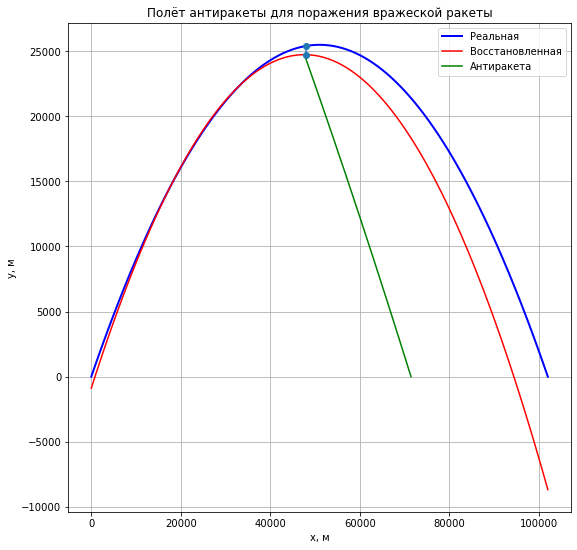

In [23]:
plt.figure(figsize=(9, 9))
plt.title("Полёт антиракеты для поражения вражеской ракеты") # заголовок
plt.xlabel("x, м") # ось абсцисс
plt.ylabel("y, м") # ось ординат
plt.grid() # включение отображение сетки
plt.plot(x, y, 'b', LineWidth = 2, label = "Реальная")
plt.plot(x, yey, 'r', label = "Восстановленная")
plt.plot(xx1, yy1, 'g', label = "Антиракета")
plt.legend()

for i in range(len(yey)):
    if (yey[i] == max(yey)):
        index = i
rad = abs(max(yey)-y[index])
print("Мин радиус взрыва (ракета) = {0:.2f} м".format(float(rad)))

plt.plot([x[index], x[index]], [yey[index], y[index]], marker = 'o')
plt.show()

In [24]:
x1 = x[0] # точка поражения вражеской базы по х
y1 = yey[0] # точка поражения вражеской базы по y

# Угол запуска антиракеты
a = -(x1-x0)
b = -g*(x1-x0)**2/(2*u0**2)
c = b-y1
D = a**2-4*b*c
betta = math.atan((-a+math.sqrt(D))/(2*b))

# Координаты антиракеты
xx2 = np.arange(0, x0, 1)
yy2 = -(xx2-x0)*math.tan(betta)-g*(xx2-x0)**2/(2*(u0**2)*(math.cos(betta))**2)

Мин радиус взрыва (база) = 887.45 м


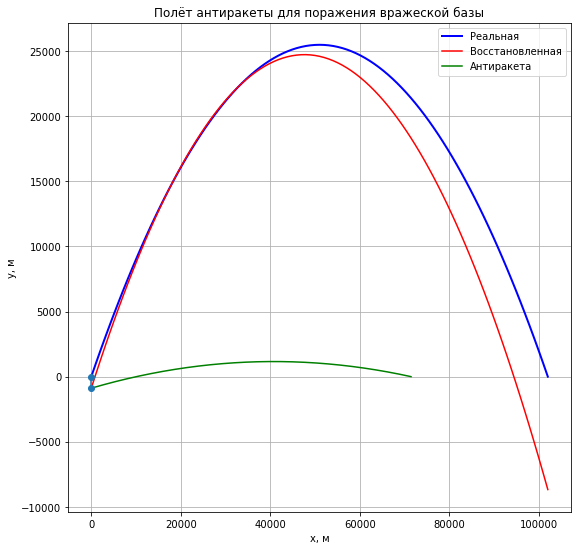

In [25]:
plt.figure(figsize=(9, 9))
plt.title("Полёт антиракеты для поражения вражеской базы") # заголовок
plt.xlabel("x, м") # ось абсцисс
plt.ylabel("y, м") # ось ординат
plt.grid() # включение отображение сетки
plt.plot(x, y, 'b', LineWidth = 2, label = "Реальная")
plt.plot(x, yey, 'r', label = "Восстановленная")
plt.plot(xx2, yy2, 'g', label = "Антиракета")
plt.legend()

rad = abs(yey[0])
print("Мин радиус взрыва (база) = {0:.2f} м".format(float(rad)))

plt.plot([0, x[0]], [0, yey[0]], marker = 'o')
plt.show()